In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('GAFA stock prices.csv')

In [5]:
df.columns

Index(['Stock', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.head()

,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,Google,19/08/2004,49.676899,51.693783,47.669952,49.845802,49.845802,44994500.0
1,Google,20/08/2004,50.178635,54.187561,49.925285,53.805050,53.805050,23005800.0
2,Google,23/08/2004,55.017166,56.373344,54.172661,54.346527,54.346527,18393200.0
3,Google,24/08/2004,55.260582,55.439419,51.450363,52.096165,52.096165,15361800.0
4,Google,25/08/2004,52.140873,53.651051,51.604362,52.657513,52.657513,9257400.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19620 entries, 0 to 19619
Data columns (total 8 columns):
Stock        19620 non-null object
Date         19620 non-null object
Open         19619 non-null float64
High         19619 non-null float64
Low          19619 non-null float64
Close        19619 non-null float64
Adj Close    19619 non-null float64
Volume       19619 non-null float64
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,19619.000000,19619.000000,19619.000000,19619.000000,19619.000000,1.961900e+04
mean,144.426622,145.870057,142.852804,144.413105,142.758556,4.883658e+07
std,235.327960,237.241513,233.124553,235.296632,235.977156,7.262879e+07
min,0.198661,0.198661,0.196429,0.196429,0.008937,7.900000e+03
25%,1.691964,1.729642,1.660714,1.695715,0.923260,6.123700e+06
50%,45.349998,46.000000,44.610001,45.389999,40.439999,2.203550e+07
75%,177.799995,179.674995,176.035004,177.900002,177.885002,6.117545e+07
max,1615.959961,1617.540039,1590.890015,1598.390015,1598.390015,1.855410e+09


In [9]:
gdf = df[df['Stock'] == 'Google']

In [10]:
gdf.head()

,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,Google,19/08/2004,49.676899,51.693783,47.669952,49.845802,49.845802,44994500.0
1,Google,20/08/2004,50.178635,54.187561,49.925285,53.805050,53.805050,23005800.0
2,Google,23/08/2004,55.017166,56.373344,54.172661,54.346527,54.346527,18393200.0
3,Google,24/08/2004,55.260582,55.439419,51.450363,52.096165,52.096165,15361800.0
4,Google,25/08/2004,52.140873,53.651051,51.604362,52.657513,52.657513,9257400.0


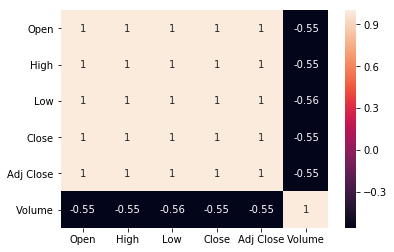

In [11]:
sns.heatmap(gdf.corr(),annot=True)

C:\Users\SUBASH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


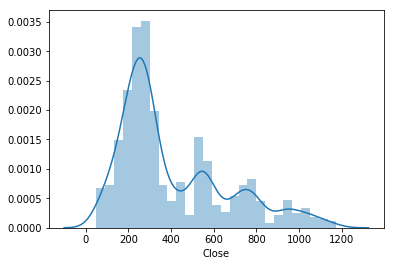

In [12]:
sns.distplot(gdf['Close'].dropna())

In [13]:
gdf['Date'] = pd.to_datetime(gdf['Date'])
gdf['Year'] = gdf['Date'].apply(lambda time : time.year)
gdf['month'] = gdf['Date'].apply(lambda time : time.month)
gdf['day'] = gdf['Date'].apply(lambda time : time.day) 


C:\Users\SUBASH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SUBASH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SUBASH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [14]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3442 entries, 0 to 3441
Data columns (total 11 columns):
Stock        3442 non-null object
Date         3442 non-null datetime64[ns]
Open         3442 non-null float64
High         3442 non-null float64
Low          3442 non-null float64
Close        3442 non-null float64
Adj Close    3442 non-null float64
Volume       3442 non-null float64
Year         3442 non-null int64
month        3442 non-null int64
day          3442 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 322.7+ KB


In [15]:
X = gdf[['Open', 'High', 'Low','Adj Close', 'Volume',
       'Year', 'month', 'day']]

y = gdf['Close']

from sklearn.cross_validation import train_test_split

C:\Users\SUBASH\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm =  LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print(lm.intercept_)

-1.3073986337985843e-12


In [21]:
lm.coef_

array([ 1.74014580e-14, -1.74661599e-14,  1.71012929e-15,  1.00000000e+00,
        1.59612926e-20,  4.42640582e-16, -8.35821409e-16, -1.15778568e-16])

In [22]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])

,Coef
Open,1.740146e-14
High,-1.746616e-14
Low,1.710129e-15
Adj Close,1.000000e+00
Volume,1.596129e-20
Year,4.426406e-16
month,-8.358214e-16
day,-1.157786e-16


In [27]:
predict = lm.predict(X_test)
predict

array([265.806183, 796.419983, 316.63559 , ..., 310.902863, 827.880005,
       255.96022 ])

In [28]:
y_test

1387     265.806183
3107     796.419983
793      316.635590
2497     591.487671
2480     572.850159
1759     280.063446
1550     268.717255
2264     425.686310
1250     223.724884
3134     796.789978
2313     504.319885
2748     662.299988
2266     429.913818
1876     288.180664
3143     819.239990
1216     205.692169
896      218.667770
1507     241.603607
1221     206.541641
2616     493.454498
909      231.350296
3178     834.570007
422      218.826736
1392     268.781830
1419     281.280548
1038     193.983322
458      190.953033
870      246.114258
126       98.310585
2770     646.830017
           ...     
3176     829.559998
2820     710.809998
1671     288.126007
61        91.837685
1476     221.037369
1861     309.218842
2873     701.789978
2015     336.382172
1098     147.749039
129       96.348351
615      245.562851
1964     288.409180
1602     298.558167
3425    1004.559998
138       92.001617
268      153.869232
1422     292.596924
3417    1135.729980
1233     210.972824


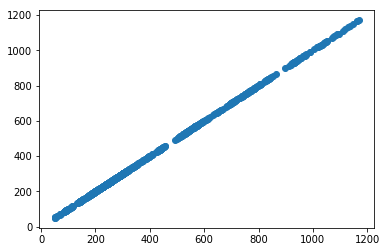

In [29]:
plt.scatter(y_test,predict)

C:\Users\SUBASH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


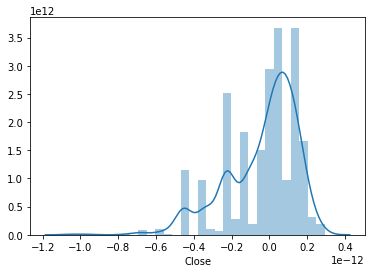

In [30]:
sns.distplot(y_test-predict)

In [31]:
from sklearn import metrics

In [32]:
metrics.mean_absolute_error(y_test,predict)

1.419984921300243e-13